### Importing the Data sets

In [140]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline


In [141]:
# Read in the data

ri = pd.read_csv('ri_data.csv.csv')

C:\Users\udobo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [142]:
# Looking at the data
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


### Data Wrangling

In [143]:
#Checking for missing values
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [144]:
# Data types for the columns
ri.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: o

In [146]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object')

In [147]:
#pd.set_option('display.max_rows',None)

In [148]:
#Subsetting the data 
df= ri[['date','time','zone','subject_race','subject_sex','type','arrest_made','outcome','contraband_drugs','search_conducted','reason_for_search', 'reason_for_stop']]

In [149]:
df.head(10)

,date,time,zone,subject_race,subject_sex,type,arrest_made,outcome,contraband_drugs,search_conducted,reason_for_search,reason_for_stop
0,2005-11-22,11:15:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
1,2005-10-01,12:20:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
2,2005-10-01,12:30:00,X3,white,female,vehicular,False,citation,NaN,False,NaN,Speeding
3,2005-10-01,12:50:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
4,2005-10-01,13:10:00,X3,white,female,vehicular,False,citation,NaN,False,NaN,Speeding
5,2005-10-01,15:50:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Other Traffic Violation
6,2005-09-11,11:45:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
7,2005-09-11,11:45:00,X3,white,female,vehicular,False,citation,NaN,False,NaN,Speeding
8,2005-10-04,11:55:00,X3,hispanic,male,vehicular,False,citation,NaN,False,NaN,Speeding
9,2005-10-04,11:55:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding


### Data Cleaning 

In [150]:
# Renaming columns
df.rename(columns={'date':'stop_date', 'time':'stop_time','type':'search_type', 'zone':'district', 'subject_race':'driver_race', 'subject_sex':'driver_gender','outcome':'stop_outcome','arrest_made':'is_arrested','contraband_drugs':'drugs_related_stop','reason_for_search':'violation_raw','reason_for_stop':'violation'},inplace=True)

C:\Users\udobo\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [151]:
df.head()

,stop_date,stop_time,district,driver_race,driver_gender,search_type,is_arrested,stop_outcome,drugs_related_stop,search_conducted,violation_raw,violation
0,2005-11-22,11:15:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
1,2005-10-01,12:20:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
2,2005-10-01,12:30:00,X3,white,female,vehicular,False,citation,NaN,False,NaN,Speeding
3,2005-10-01,12:50:00,X3,white,male,vehicular,False,citation,NaN,False,NaN,Speeding
4,2005-10-01,13:10:00,X3,white,female,vehicular,False,citation,NaN,False,NaN,Speeding


In [152]:
df.isnull().sum()

stop_date                 10
stop_time                 10
district                  10
driver_race            29073
driver_gender          29097
search_type                0
is_arrested            29073
stop_outcome           35841
drugs_related_stop    493693
search_conducted           0
violation_raw         491919
violation              29073
dtype: int64

In [153]:
df.dropna(subset=['driver_gender'],inplace=True)

C:\Users\udobo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [154]:
df.isnull().sum()

stop_date                  0
stop_time                  0
district                   0
driver_race                0
driver_gender              0
search_type                0
is_arrested                0
stop_outcome            6763
drugs_related_stop    464596
search_conducted           0
violation_raw         462822
violation                  0
dtype: int64

In [155]:
df.shape

(480584, 12)

In [156]:
df.dtypes

stop_date             object
stop_time             object
district              object
driver_race           object
driver_gender         object
search_type           object
is_arrested           object
stop_outcome          object
drugs_related_stop    object
search_conducted        bool
violation_raw         object
violation             object
dtype: object

In [157]:
df.drugs_related_stop.value_counts()

False    11223
True      4765
Name: drugs_related_stop, dtype: int64

In [158]:
df['drugs_related_stop'] = df.drugs_related_stop.astype("bool")

C:\Users\udobo\AppData\Local\Temp/ipykernel_9796/1755143654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drugs_related_stop'] = df.drugs_related_stop.astype("bool")


In [159]:
df['is_arrested'] = df.is_arrested.astype("bool")

C:\Users\udobo\AppData\Local\Temp/ipykernel_9796/3830093069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_arrested'] = df.is_arrested.astype("bool")


In [160]:
df.is_arrested.dtypes

dtype('bool')

In [161]:
#concatenate stop_date and stop_time (separated by a space)
combined = df.stop_date.str.cat(df.stop_time, sep=' ')

In [162]:
#convert to datetime 
df['stop_datetime'] = pd.to_datetime(combined)

C:\Users\udobo\AppData\Local\Temp/ipykernel_9796/651788517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stop_datetime'] = pd.to_datetime(combined)


In [163]:
df.dtypes

stop_date                     object
stop_time                     object
district                      object
driver_race                   object
driver_gender                 object
search_type                   object
is_arrested                     bool
stop_outcome                  object
drugs_related_stop              bool
search_conducted                bool
violation_raw                 object
violation                     object
stop_datetime         datetime64[ns]
dtype: object

In [164]:
df.set_index('stop_datetime',inplace=True)

In [165]:
df.shape

(480584, 12)

In [167]:
df.violation.value_counts()

Speeding                            268736
Other Traffic Violation              90228
Equipment/Inspection Violation       61250
Registration Violation               19830
Seatbelt Violation                   16324
Special Detail/Directed Patrol       13642
Call for Service                      7605
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               989
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: violation, dtype: int64

In [168]:
to_drop = ['Warrant','Suspicious Person','APB','Motorist Assist/Courtesy','Call for Service','Special Detail/Directed Patrol']

In [169]:
df = df[~df['violation'].isin(to_drop)]

In [170]:
df['violation'].value_counts(normalize=True)

Speeding                            0.587524
Other Traffic Violation             0.197261
Equipment/Inspection Violation      0.133908
Registration Violation              0.043353
Seatbelt Violation                  0.035688
Violation of City/Town Ordinance    0.002265
Name: violation, dtype: float64

In [171]:
#Do the gender commit different violations?
#create a Dataframe of female drivers
female_driver = df[df.driver_gender =='female']


In [172]:
male_driver = df[df.driver_gender =='male']

### Exploratory Data Analysis

#### Research queston1: Is there any comparison in violation among gender

In [173]:
male_driver.violation.value_counts(normalize=True)

Speeding                            0.553412
Other Traffic Violation             0.219248
Equipment/Inspection Violation      0.143133
Registration Violation              0.042993
Seatbelt Violation                  0.038728
Violation of City/Town Ordinance    0.002486
Name: violation, dtype: float64

In [174]:
female_driver.violation.value_counts(normalize=True)

Speeding                            0.675729
Other Traffic Violation             0.140409
Equipment/Inspection Violation      0.110055
Registration Violation              0.044284
Seatbelt Violation                  0.027829
Violation of City/Town Ordinance    0.001693
Name: violation, dtype: float64

#### Research question2: Does gender affect who gets a ticket for speeding?


In [175]:
# Create a dataframe for female drivers stopped for speeding
# Filtering by multiple conditions
female_and_speeding = df[(df.driver_gender =='female') & (df.violation =='Speeding')]

In [176]:
male_and_speeding = df[(df.driver_gender =='male') & (df.violation =='Speeding')]

#### Research question3: Is there any comparison in speeding outcomes among gender

In [177]:
female_and_speeding.stop_outcome.value_counts(normalize=True)

citation    0.954609
warning     0.039059
arrest      0.006332
Name: stop_outcome, dtype: float64

In [178]:
male_and_speeding.stop_outcome.value_counts(normalize=True)

citation    0.946763
warning     0.036167
arrest      0.017070
Name: stop_outcome, dtype: float64

#### Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

In [179]:
df.search_conducted.mean()

0.03655193220872577

In [180]:
df[df.driver_gender == "female"].search_conducted.mean()

0.018014628066132028

#### Research question4: Does gender affect whose vehicle is searched?

In [181]:
df.groupby(['driver_gender','violation']).search_conducted.mean()

driver_gender  violation                       
female         Equipment/Inspection Violation      0.040245
               Other Traffic Violation             0.038021
               Registration Violation              0.054700
               Seatbelt Violation                  0.017746
               Speeding                            0.007738
               Violation of City/Town Ordinance    0.060185
male           Equipment/Inspection Violation      0.070916
               Other Traffic Violation             0.059156
               Registration Violation              0.103589
               Seatbelt Violation                  0.031705
               Speeding                            0.026630
               Violation of City/Town Ordinance    0.073171
Name: search_conducted, dtype: float64

In [182]:
df['inventory'] = df.violation_raw.str.contains("Inventory",na=False)

In [183]:
df.inventory.sum()

2049

In [184]:
searched = df[df.search_conducted ==True]

In [185]:
searched.inventory.mean()

0.12255517674502063

In [186]:
searched.groupby('driver_gender').inventory.mean()

driver_gender
female    0.144038
male      0.119132
Name: inventory, dtype: float64

In [187]:
#Calculate the hourly arrest rate
df.groupby(df.index.hour).is_arrested.mean()

stop_datetime
0     0.049004
1     0.062013
2     0.056055
3     0.048708
4     0.040422
5     0.017372
6     0.011738
7     0.012681
8     0.018094
9     0.023758
10    0.025348
11    0.026767
12    0.030581
13    0.029634
14    0.030026
15    0.030337
16    0.030592
17    0.032922
18    0.033554
19    0.027290
20    0.034754
21    0.051530
22    0.039861
23    0.042041
Name: is_arrested, dtype: float64

In [188]:
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()


#### Research question5: Does time of day affect arrest rate?

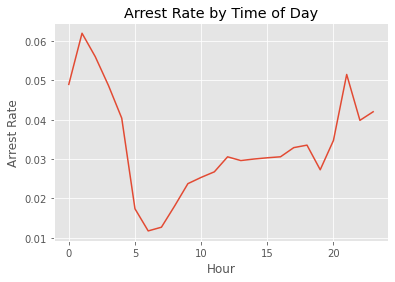

In [189]:
# Plotting the hourly arrest rate
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

#### Research question6: Is there any comparison between drug and search rates?

In [190]:
# Resampling is when you change the frequency of the the time series.
# Calculating the annual rate of drug_related stops
annual_drug_rate = df.drugs_related_stop.resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.964585
2006-12-31    0.973191
2007-12-31    0.972007
2008-12-31    0.973289
2009-12-31    0.965965
2010-12-31    0.971806
2011-12-31    0.976891
2012-12-31    0.980898
2013-12-31    0.985882
2014-12-31    0.985324
2015-12-31    0.986532
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

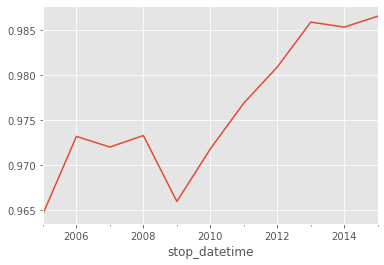

In [191]:
annual_drug_rate.plot()
plt.show()

In [192]:
annual_search_rate = df.search_conducted.resample('A').mean()

In [193]:
annual = pd.concat([annual_drug_rate,annual_search_rate],axis=1)

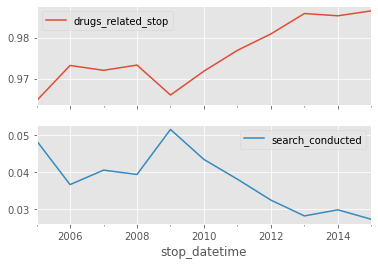

In [194]:
annual.plot(subplots=True)
plt.show()

#### The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?


#### Research question7: what violations are caught in each district?

In [195]:
all_zones = pd.crosstab(df.district,df.violation)
all_zones

violation,Equipment/Inspection Violation,Other Traffic Violation,Registration Violation,Seatbelt Violation,Speeding,Violation of City/Town Ordinance
district,,,,,,
K1,3786,7127,628,1,33067,21
K2,11285,16440,4056,2897,57500,237
K3,12959,16218,3871,3660,68234,194
X1,1725,3711,192,451,6393,6
X3,11520,17178,3532,4445,48687,282
X4,19975,29554,7551,4870,54855,296


In [196]:
k_zones = all_zones.loc['K1':'K3']
k_zones

violation,Equipment/Inspection Violation,Other Traffic Violation,Registration Violation,Seatbelt Violation,Speeding,Violation of City/Town Ordinance
district,,,,,,
K1,3786,7127,628,1,33067,21
K2,11285,16440,4056,2897,57500,237
K3,12959,16218,3871,3660,68234,194


#####  The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

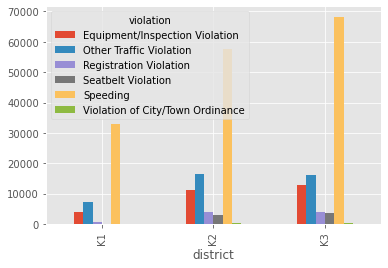

In [197]:
k_zones.plot(kind='bar')
plt.show()

In [198]:
search_rate = df.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment/Inspection Violation      0.063886
Other Traffic Violation             0.054961
Registration Violation              0.089662
Seatbelt Violation                  0.028669
Speeding                            0.020570
Violation of City/Town Ordinance    0.070463
Name: search_conducted, dtype: float64

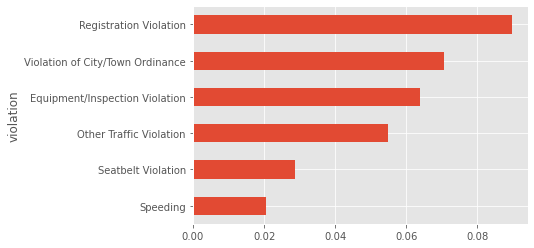

In [199]:
search_rate.sort_values().plot(kind='barh')
plt.show()

### Conclusion 

### Limitation